In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris

In [23]:
class GD:

    def __init__(self, eta, n_iter): # 초기화함수 : 개체 생성할 때 자동 호출
        self.eta = eta #가중치 갱신 비율
        self.n_iter = n_iter # 학습 반복 횟수
        
    def net_input(self, x):
        return np.dot(x, self.w[1:] ) + self.w[0] # x1 * w1 ..... xn * wn + b(w0)
        

    def activation(self, x):
        return self.net_input(x) # 항등함수 : 입력값 그대로 활성화 출력
    
    def predict(self, x):
        output = self.activation(x)
        return np.where(output > 0, 1, -1)
    
    def fit(self, x, y):
            self.w = np.zeros(x.shape[1] + 1) # X.shape : 2차원 배열의 열 갯수
            self.cost = [] # 오차배열 만들기 (오차로그용)

            for idx in np.arange(self.n_iter): # 학습 반복
                output = self.activation(x) # net_input + activation -> 1 or -1 반환
                errors = y - output      # 오차 계산 (실제값 - 출력값)
                delta = self.eta * x.T.dot(errors)     # 학습률 * 기울기(편미분)
                self.w[1:] += delta     # 가중치 업데이트
                self.w[0] += self.eta * errors.sum()      # 가중치(편향) 업데이트
                self.cost.append( (errors**2).sum() )
                
            return self
               


In [24]:
model = GD(eta= 0.00001, n_iter= 5000) # GD객체(인스턴스) 만들기

In [25]:
df_iris = load_iris()
x = df_iris['data'][:100]
y = df_iris['target'][:100]
y = np.where(y == 0, 1, -1)
y


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [26]:
model.fit(x, y)

In [27]:
model.w

array([ 0.07055571,  0.10562385,  0.35424752, -0.54202746, -0.25106858])

In [30]:
model.cost[:5], model.cost[-5:]

([np.float64(100.0),
  np.float64(99.48959321565404),
  np.float64(98.99539307141738),
  np.float64(98.51593613603924),
  np.float64(98.0499022784305)],
 [np.float64(3.847519833782483),
  np.float64(3.8475142231228863),
  np.float64(3.847508612752813),
  np.float64(3.847503002672215),
  np.float64(3.847497392881042)])

In [31]:
correct = []
for idx in range(x.shape[0]):
    pv = model.predict(x[idx])
    correct.append(pv == y[idx])

print( "Accuracy: {0}".format( np.mean(correct) ) )

Accuracy: 1.0


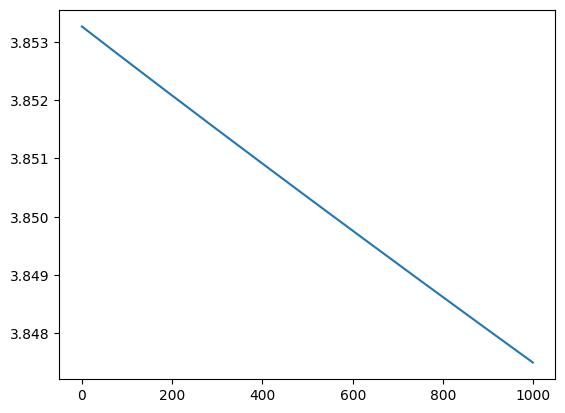

In [36]:
#plt.plot(np.arange(len(model.cost)), model.cost)
plt.plot(np.arange(0, len(model.cost[-1000:])), model.cost[-1000:])
plt.show()